In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import math

In [23]:
def initialization(population_size, num_dimensions):
    """
    Initialize the starting population with random individuals.
    Each gene of an individual corresponds a dimension in the function
    param: population_size number of individuals in the population
    num_dimension: the number of dimensions
    """
    x = np.random.uniform(-1, 1, size = (population_size, num_dimensions)) # each individual is a vector

    # print(f'Initialization x: {x}')
    return x

In [ ]:
def load_processed_data(file_path):
    '''
    The function reads the data from the create feature_151.csv file.
    '''

    data_dict = {}

    with open(file_path, newline='') as f:
        reader = csv.DictReader(f)
        for row in reader:
            kicktime = float(row['Kick_Time'])
            x = float(row['x'])
            y = float(row['y'])
            vx = float(row['vx'])
            vy = float(row['vy'])
            x_wall = float(row['x_wall'])
            y_wall = float(row['y_wall'])
            tangent_x = float(row['tangent_x'])
            tangent_y = float(row['tangent_y'])
            radius_x = float(row['radius_x'])
            radius_y = float(row['radius_y'])
            wall_distance = float(row['wall_distance'])

            if kicktime not in data_dict:
                data_dict[kicktime] = {
                    'x_coords': [],
                    'y_coords': [],
                    'vx_list': [],
                    'vy_list': [],
                    'wall_vectors': [],
                    'wall_x': [],
                    'wall_y': [],
                    'tangent_vectors': [],
                    'radius_vectors': [],
                    'wall_distances': []
                }

            data_dict[kicktime]['x_coords'].append(x)
            data_dict[kicktime]['y_coords'].append(y)
            data_dict[kicktime]['vx_list'].append(vx)
            data_dict[kicktime]['vy_list'].append(vy)
            data_dict[kicktime]['wall_x'].append(x_wall)
            data_dict[kicktime]['wall_y'].append(y_wall)
            data_dict[kicktime]['tangent_vectors'].append((tangent_x, tangent_y))
            data_dict[kicktime]['radius_vectors'].append((radius_x, radius_y))
            data_dict[kicktime]['wall_distances'].append(wall_distance)

    return data_dict

In [ ]:
def distance_velocity(file_path):
    """
    The function reads file "distance_difference_151.csv".
    """
    kick_times = {}
    with open(file_path) as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter = ",")

        for row in csv_reader:
            kick_time = float(row["Kick_Time"])
            agent_id = int(row["Agent_ID"])
            vx = float(row["vx"])
            vy = float(row["vy"])
            
            if kick_time not in kick_times:
                kick_times[kick_time] = []
            kick_times[kick_time].append((agent_id, vx, vy))
    return kick_times

distance_velocity("distance_difference_151.csv")

{0.8: [(3, 0.0, 0.0),
  (1, 0.0, 0.0),
  (2, 0.0, 0.0),
  (5, 0.0, 0.0),
  (4, 0.0, 0.0)],
 1.28: [(3, -0.0833, -0.0762),
  (4, -0.0301, -0.0618),
  (1, -0.0149, -0.0455),
  (5, -0.0405, -0.0456),
  (2, -0.0441, -0.0285)],
 2.2: [(3, -0.0458, -0.0795),
  (1, -0.0638, -0.0823),
  (4, -0.0389, -0.1049),
  (2, -0.0817, -0.0633),
  (5, -0.0594, -0.0437)],
 3.32: [(3, 0.0471, -0.1627),
  (1, 0.0102, -0.1477),
  (4, 0.0468, -0.133),
  (2, 0.0541, -0.1683),
  (5, -0.0385, -0.1344)],
 3.68: [(3, 0.1137, -0.033),
  (2, 0.065, -0.0419),
  (1, 0.0592, -0.0251),
  (4, 0.0374, -0.0404),
  (5, 0.088, -0.0723)],
 4.08: [(3, 0.0811, -0.0061),
  (2, 0.0887, -0.0083),
  (1, 0.0561, -0.0322),
  (5, 0.0772, -0.0381),
  (4, 0.0516, -0.0233)],
 5.08: [(3, 0.1661, 0.0976),
  (2, 0.1577, 0.0801),
  (5, 0.2063, 0.0549),
  (1, 0.1741, 0.0383),
  (4, 0.1635, 0.0548)],
 5.64: [(3, -0.0025, 0.0794),
  (5, 0.018, 0.0754),
  (2, 0.015, 0.0937),
  (1, 0.0393, 0.0845),
  (4, 0.0437, 0.0587)],
 7.72: [(3, -0.1519, 0.17

In [ ]:
def bias_zero(data_dict, kicktime, heading, mode):
    """
    The function simulate no environmental influence.
    """
    
    return np.array([0.0, 0.0])

In [ ]:
def bias_random(data_dict, kicktime, heading, mode):
    """
    The function simulate some random noise.    
    """
    
    rand_x = random.uniform(-0.25, 0.25)
    rand_y = random.uniform(-0.25, 0.25)

    return np.array([rand_x, rand_y])

In [ ]:
def bias_wall(data_dict, kicktime, heading, mode):
    '''
    The function simulates the wall influence.
    '''

    # x_fish = x 
    # y_fish = y 
    # distance_to_origin = math.sqrt(x_fish**2 + y_fish**2)
    # x_wall = (x_fish  / distance_to_origin) * radius
    # y_wall = (y_fish  / distance_to_origin) * radius
    # vector_x = x_wall - x_fish
    # vector_y = y_wall - y_fish
    
    return np.array(data_dict[kicktime]['radius_vectors'][0])

In [ ]:
def bias_wall_zone(data_dict, kicktime, heading, mode):
    """
    The function simulates different fish movements based on the focal fish distance to the wall.
    
    """

    radius = 0.25
    

    x_wall = data_dict[kicktime]['wall_x'][0]
    y_wall = data_dict[kicktime]['wall_y'][0]

    radial_vector = np.array(data_dict[kicktime]['radius_vectors'][0])
    tangent_vector = np.array(data_dict[kicktime]['tangent_vectors'][0])
    wall_distance = data_dict[kicktime]['wall_distances'][0]

    # if np.dot(tangent_vector, heading) < 0:
    #     tangent_vector = -tangent_vector

    if mode == 'repulsion_zone':
        repulsion = 0.035
        if wall_distance < repulsion:
            return tangent_vector
        else:
            return np.array([0.0, 0.0])
    
    elif mode == 'alignment_zone':
        align = 0.125
        repulsion = 0
        if wall_distance < align:
            smooth = ((repulsion - wall_distance) / (align - repulsion)) * -1
            return (1 - smooth) * radial_vector + smooth * tangent_vector
        else:
            return np.array([0.0, 0.0])

    
    elif mode == 'alignment_domain':
        align = radius
        repulsion = 0
        if wall_distance < align:
            smooth = ((repulsion - wall_distance) / (align - repulsion)) * -1
            return (1 - smooth) * radial_vector + smooth * tangent_vector
    
    elif mode == 'repulsion_alignment_zone':
        repulsion = 0.035
        align = 0.125
        if wall_distance < repulsion:
            return tangent_vector
    
        elif wall_distance < align:
            smooth = ((repulsion - wall_distance) / (align - repulsion)) * -1
            return (1 - smooth) * radial_vector + smooth * tangent_vector
        else:
            return np.array([0.0, 0.0])

        
    elif mode == 'repulsion_alignment_domain':
        repulsion = 0.035
        align = 0.25
        if wall_distance < repulsion:
            return tangent_vector
    
        elif wall_distance < align:
            smooth = ((repulsion - wall_distance) / (align - repulsion)) * -1
            return (1 - smooth) * radial_vector + smooth * tangent_vector
        

In [ ]:
def bias_positive(data_dict, kicktime, heading, mode):
    '''
    The function steer a positive movement towards the wall.
    '''
    
    return np.array([1.0, 1.0])

In [ ]:
def bias_negative(data_dict, kicktime, heading, mode):
    '''
    The function steer a negative movement pushes towards the center.
    '''
    return np.array([-1.0, -1.0])

In [ ]:
def objective_function(bias_flag, bias_func, distance_file, data_dict, mode, dim, loss, c = None, focal_agent = 3, experiment_id = 151):  
    """
    Computes the loss between predicted and actual velocities for a focal fish.

    bias_flag: Bool: If true include the wall as a bias term.
    bias_func: Function: Computes the wall influence (Bias Strategy) to simulate env influence - 2D vector.
    distance_file: Dict: mapps kickt time to lists of (agend_id. vx, vy). 
    data_dict: Dict: per-kicktime data including positions and velocitites.
    mode: str: Wall Bias has 5 different configurations (repulsion zone, alignment zone, repulsion alignment zone..). 
    dim: int: number of velocity vecor including the bias term.
    loss: Loss function type (cosine, SSE Kick Time or SSE Trajectory)
    c = None: optional array of weights, None: random initialized.
    focal_agent: The focal fish ID.
    experiment_id: The current experiment ID.
    returns: float - Fitness - loss value.
    """
    predicted_positions_list = []
    actual_positions_list = []

    # init weight vector
    if c is None:
        c = np.random.rand(dim)

    alpha, beta, gamma, delta, epsilon = c[0], c[1], c[2], c[3], c[4]
    bias = c[5]
    weights = np.array([alpha, beta, gamma, delta, epsilon, bias])

    if not bias_flag:
        weights[5] = 0.0

    
    # L1 normalization
        
    if np.count_nonzero(weights) > 0:
        norm = np.linalg.norm(weights, ord = 1)
        weights = weights / norm

    kicktimes = []
    mse_loss = 0.0
    
    for key in distance_file:
        kicktimes.append(key)

    # Initialize predicted velocity at first kicktime from data
    for agent_id, vx, vy in distance_file[kicktimes[0]]:
        if agent_id == focal_agent:
            predicted_velocity = np.array([vx, vy])
            break
    

    # inital position at timestep 0 
    first_kicktime = np.min(kicktimes)
    initial_x = data_dict[first_kicktime]['x_coords'][0]  # focal agent is at position 0
    initial_y = data_dict[first_kicktime]['y_coords'][0]

    predicted_position = np.array([initial_x, initial_y])
    # print(predicted_position)

    for i in range(len(kicktimes)-1):

        kicktime = kicktimes[i]
        next_kicktime = kicktimes[i + 1]
        
        # velocity lists for current and next times
        velocities = distance_file[kicktime]
        next_velocities = distance_file[next_kicktime]

        # replace focal fish velocity with the prediction

        updated_velocity = []
           
        for j, (agent_id, vx, vy) in enumerate(next_velocities):
            if j == 0:
                updated_velocity.append((agent_id, predicted_velocity[0], predicted_velocity[1]))
            else:
                updated_velocity.append((agent_id, vx, vy))
           
        # Weighted Sum of all velocities (neighbor + bias)
        vx_total = 0.0
        vy_total = 0.0   
            
        for j, (agent_id, vx, vy) in enumerate(updated_velocity):
            weight = weights[j]
          
            vx_total += vx * weight  
            vy_total += vy * weight 
        
        # Bias
        if bias_flag:
            bias = bias_func(data_dict, kicktime, predicted_velocity, mode)
            vx_total += bias[0] * weights[5]  # Multiply by the bias agent's weight
            vy_total += bias[1] * weights[5]  # Multiply by the bias agent's weight
        
        predicted_velocity = np.array([vx_total, vy_total]) 

        # update - compute the loss

        if loss == 'cosine':
            actual_velocity = np.array([
            data_dict[next_kicktime]['vx_list'][0],
            data_dict[next_kicktime]['vy_list'][0]
        ])

            dotproduct = np.dot(actual_velocity, predicted_velocity)

            magnitude_a = np.linalg.norm(actual_velocity)
            magnitude_b = np.linalg.norm(predicted_velocity)

            cosine_similarity = dotproduct / (magnitude_a * magnitude_b)

            sse_loss = 1 - np.round(cosine_similarity, 4)
         
        else:

            if loss == 'mse_kicktime':
                # per kicktime sse loss
                updated_x = data_dict[kicktimes[i]]['x_coords'][0]  # focal agent is at position 0
                updated_y = data_dict[kicktimes[i]]['y_coords'][0]

                predicted_position = np.array([updated_x, updated_y])
                predicted_position += predicted_velocity
            
            elif loss == 'mse_trajectory':
                # trajectory sse loss
                predicted_position += predicted_velocity


            actual_position = np.array([
                data_dict[next_kicktime]['x_coords'][0],
                data_dict[next_kicktime]['y_coords'][0]
            ])

            # Squared distance error
            delta_x = predicted_position[0] - actual_position[0]
            delta_y = predicted_position[1] - actual_position[1]
            distance = np.sqrt(delta_x**2 + delta_y**2)

            mse_loss += distance** 2

    return mse_loss

In [ ]:
def evaluation(x, objective_function, bias_flag, bias_func, distance_file, data_dict, mode, dim, loss): 
    """
    Evaluate the fitness of the population members
    """

    fitness = []

    # iterating over each member of the population and evaluating each members fitness
    for i in range(len(x)):
        mse_loss = objective_function(bias_flag = bias_flag, bias_func = bias_func, distance_file= distance_file, data_dict = data_dict, mode = mode, dim =dim, loss = loss, c = x[i])
        fitness.append(mse_loss)

    fitness = np.array(fitness) #converting the stored list into an numpy array
    return fitness

In [34]:
def mutation(x, mutation_rate):
    """
    Apply mutation by adding small Gaussian noise to each element.
 
    """

    for individual in x: 
        for i in range(len(individual)):
            ran = np.random.uniform(0.0, 1) - 0.5
            individual[i] = individual[i] + mutation_rate * ran

    x = np.clip(x, -1, 1)

    return x


In [ ]:
def crossover(x_parents, p_crossover, objective_function,  bias_flag, bias_func, distance_file, data_dict, mode, dim, loss):
    """
    Perform crossover to create offsprings.
    """

    fitness = evaluation(x_parents, objective_function, bias_flag, bias_func, distance_file, data_dict, mode, dim, loss) # Evaluate fitness of parents
    best_fitness = np.argsort(fitness) # Sorted based on fitness to find the minimum
    num_parents = len(x_parents)
    num_dimensions = len(x_parents[0])
    offspring = np.empty_like(x_parents) # Return an empty array with shape and type of input -> x_parents.

    for i in range(0, num_parents, 2): # iterate over pairs of parent
        parent1 = x_parents[best_fitness[i]] # select the best fitness
        parent2 = x_parents[best_fitness[i + 1]] # select the second parent with the next best fitness

        if np.random.rand() < p_crossover: # check if cross_over should occur
            crossover_point = np.random.randint(1, num_dimensions) # crossover point randomized

            # Create offbrings by concatenating both strings of parent determined by a random number
            offspring[i] = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            offspring[i + 1] = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))

        else: # cross_over did not occur, keep the best fitness as offspring
            offspring[i] = x_parents[best_fitness[i]]
            offspring[i + 1] = x_parents[best_fitness[i + 1]]

    return offspring

In [36]:
def parent_selection(x, f, k):
    """Select parents for the next generation"""

    x_array = np.array(x)
    f_array = np.array(f)

    matching_pool_x = []
    matching_pool_f = []

    while len(matching_pool_x) < len(x_array):
        idx = np.random.choice(len(x_array), k, replace = False)
        fitness = f[idx]

        best_idx = idx[np.argmin(fitness)]

        matching_pool_x.append(x_array[best_idx])
        matching_pool_f.append(f_array[best_idx])

    return np.array(matching_pool_x), np.array(matching_pool_f)
        

In [37]:
def survivor_selection(x, f, x_offspring, f_offspring):
    """Select the survivors, for the population of the next generation"""

    #Concatenate parents ans their offspring
    combined_population = np.concatenate((x, x_offspring))

    # Concatenate fitness of parents and their offspring
    combined_fitness = np.concatenate((f, f_offspring))

    # Sorting the fitness
    best_fitness_index = np.flip(np.argsort(combined_fitness))[::-1]


    # new poulation based on the best fitness of parent and offspring
    x = combined_population[best_fitness_index[:len(x)]]
    # print(f'Combined_Population: {x}')

    f = combined_fitness[best_fitness_index[:len(x)]]
    # print(f'Combined_Fitness: {f}')
    return x, f

In [38]:
def ea(
    # hyperparameters of the algorithm
    population_size,
    max_fit_evals,  # Maximum number of evaluations
    p_crossover,  # Probability of performing crossover operator
    m_rate,
    k,   # mutation rate
    mode,
    dimensions,  # number of dimensions
    bias_flag, 
    bias_func,
    distance_file, 
    data_dict, 
    loss,
    objective_function,  # objective function to be minimized

):
  
    # Calculate the maximum number of generations
    # Maximum number of function evaluations should be the same independent of the population size
    x = initialization(population_size, dimensions)
    print(f"Initial population shape: {x.shape}")  # Should be (population_size, 6)
    
    max_generations = 100 
    
    # max_generations = int(max_fit_evals / population_size)  # DO NOT CHANGE
    # print(f'max generation: {max_generations}')
    
    ################################################################
    # PLEASE FILL IN
    # x = initialization(population_size, dimensions)
    f = evaluation(x, objective_function, bias_flag, bias_func, distance_file, data_dict, mode, dimensions, loss)
    ################################################################

    # Find the best individual and append to a list to keep track in each generation
    idx = np.argmin(f)
    x_best = [x[idx]]
    f_best = [f[idx]]
    weights_best = [x_best[0]]


    # Loop over the generations
    for gen in range(max_generations - 1):
        # Perform the EA steps
        x_parents, f_parents = parent_selection(x, f, k)
        # print(len(x), len(x_parents))

        x_offspring = crossover(x_parents, p_crossover, objective_function, bias_flag, bias_func, distance_file, data_dict, mode, dimensions, loss)
        x_offspring = mutation(x_offspring, mutation_rate= m_rate)
        f_offspring = evaluation(x_offspring, objective_function, bias_flag, bias_func, distance_file, data_dict, mode, dimensions, loss)
        x,f= survivor_selection(x, f, x_offspring, f_offspring)
        
        ################################################################
        
        # PLEASE FILL IN

        ################################################################
        

        # Find the best individual in current generation and add to the list
        idx = np.argmin(f)
        xi_best = x[idx]
        fi_best = f[idx]

        # if fi_best < f_best[-1]:
        x_best.append(xi_best)
        f_best.append(fi_best)
            

    return x_best, f_best # return the best solution and fitness in each generation


In [39]:

def save_to_csv(all_x_values, all_fitness_values, filename="all_runs_best_solution.csv"):
    """Save all x values and their corresponding fitness values from all runs to a single CSV file."""
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Write header
        writer.writerow(["Run", "Generation", "Best X Value", "Best Fitness Value"])
        
        # Write the best solution for each generation across all runs
        for run, (x_values, f_values) in enumerate(zip(all_x_values, all_fitness_values), start=1):
            for generation, (best_x, best_fitness) in enumerate(zip(x_values, f_values)):
                writer.writerow([run, generation, best_x, best_fitness])

In [ ]:
import matplotlib.pyplot as plt

def plot_fitness_over_time(all_runs):
    plt.figure(figsize=(10, 6))

    num_generations = len(all_runs[0])  # Get the number of generations from the first run

    # Plot each run
    for i, run in enumerate(all_runs):
        generations = list(range(num_generations))  
        fitness_values = run 
        plt.plot(generations, fitness_values, label=f'Run {i+1}')
    
    plt.xlabel('Generations')
    plt.ylabel('Best Fitness')
    plt.title('Fitness Over Generations Across All Runs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
def run_experiment(population_size, p_crossover, m_rate, k, dimensions):
    """
    population_size: Integer value. Size of the population.
    p_crossocer: float value. The possibility to let crossover happen.
    m_rate: float value. The mutation_rate is an added noise to the weight.
    k: Integer value representing the size of the tournamnet in parent selection.
    dimensions: Integer value representing the dim of the weights.
    """
    runs = 20
    max_fit_evals = 1000

    
    data_dict = load_processed_data("features_151.csv")
    distance_file = distance_velocity("distance_difference_151.csv") 

    loss_function = 'mse_kicktime'
    
    bias_configurations = [
    {"name": "bias_wall_zone", "bias_function": bias_wall_zone, "flag": True, "loss": loss_function, "modes": [
    'repulsion_zone',
    'alignment_zone',
    'alignment_domain',
    'repulsion_alignment_zone',
    'repulsion_alignment_domain',
                            ]},
    {"name": "bias_zero", "bias_function": bias_zero, "flag": False, "loss": loss_function, "modes": [None]},
    {"name": "bias_random", "bias_function": bias_random, "flag": True, "loss": loss_function, "modes": [None]},
    {"name": "bias_wall", "bias_function": bias_wall, "flag": True, "loss": loss_function, "modes": [None]},
    
    {"name": "bias_positive", "bias_function": bias_positive, "flag": True, "loss": loss_function, "modes": [None]},
    {"name": "bias_negative", "bias_function": bias_negative, "flag": True, "loss": loss_function, "modes": [None]},
    ]

    for config in bias_configurations:
        loss = config['loss']
        bias_func = config['bias_function']
        bias_flag = config['flag']
        name = config['name']

        for mode in config['modes']:
            print(f"\nRunning: {loss} {name}, flag={bias_flag}, mode={mode}")

            all_runs_f = []
            all_runs_x = []

            for _ in range(runs):
                x_best, f_best = ea(
                    population_size,
                    max_fit_evals,
                    p_crossover,
                    m_rate, 
                    k, 
                    mode,
                    dimensions,
                    bias_flag, 
                    bias_func, 
                    distance_file,
                    data_dict,
                    loss,
                    objective_function,
                )
                
                all_runs_f.append(f_best)
                all_runs_x.append(x_best)
        
            filename = f"{loss}_results_{name}"
            if mode:
                filename += f"_{mode}"
            filename += ".csv"
            
            save_to_csv(all_runs_x, all_runs_f, filename = filename)

            plot_fitness_over_time(all_runs_f)

    return all_runs_f, all_runs_x



Running: mse_kicktime bias_wall_zone, flag=True, mode=repulsion_zone
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)


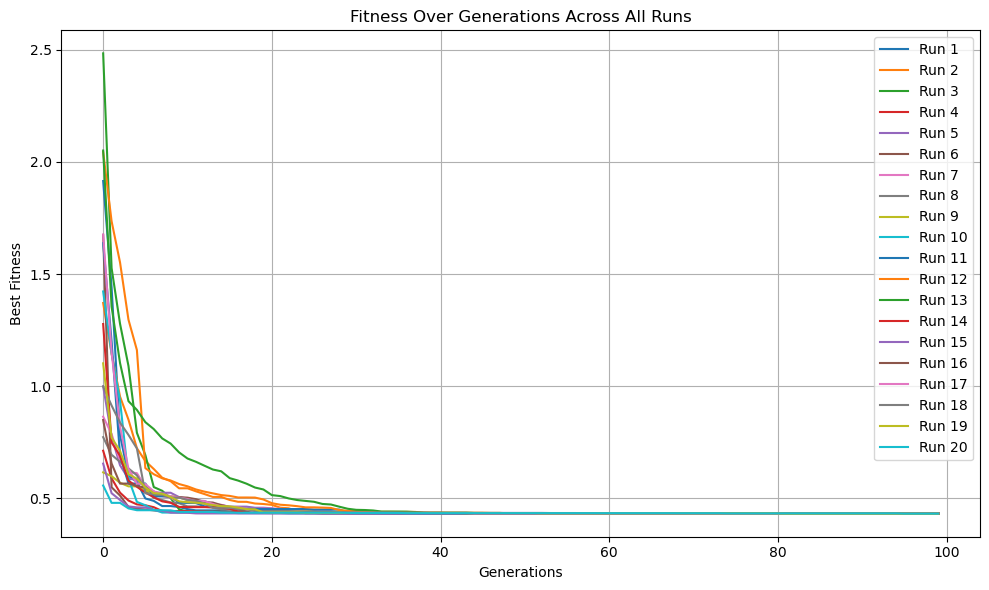


Running: mse_kicktime bias_wall_zone, flag=True, mode=alignment_zone
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)


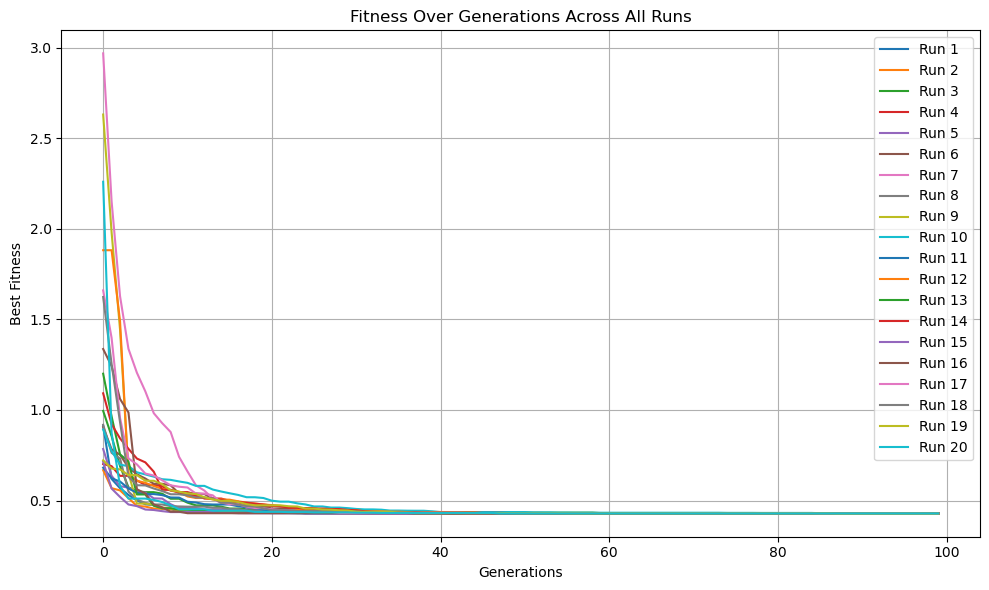


Running: mse_kicktime bias_wall_zone, flag=True, mode=alignment_domain
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)


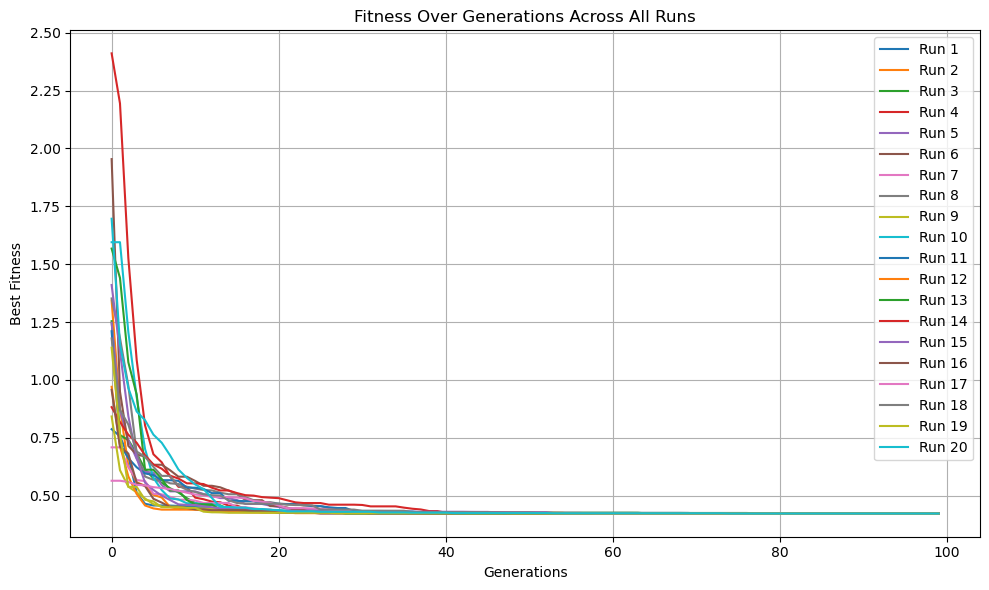


Running: mse_kicktime bias_wall_zone, flag=True, mode=repulsion_alignment_zone
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)


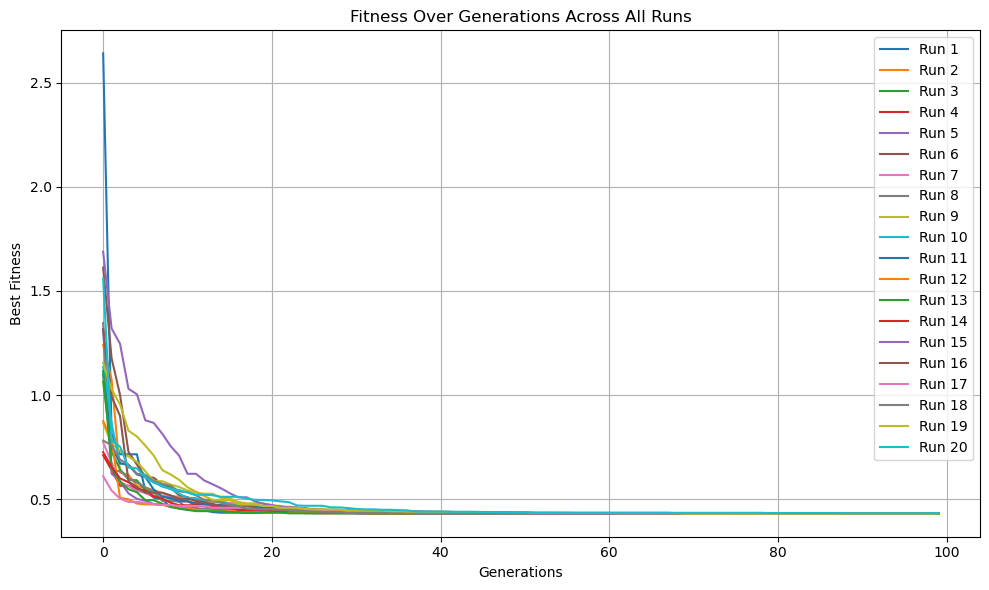


Running: mse_kicktime bias_wall_zone, flag=True, mode=repulsion_alignment_domain
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)


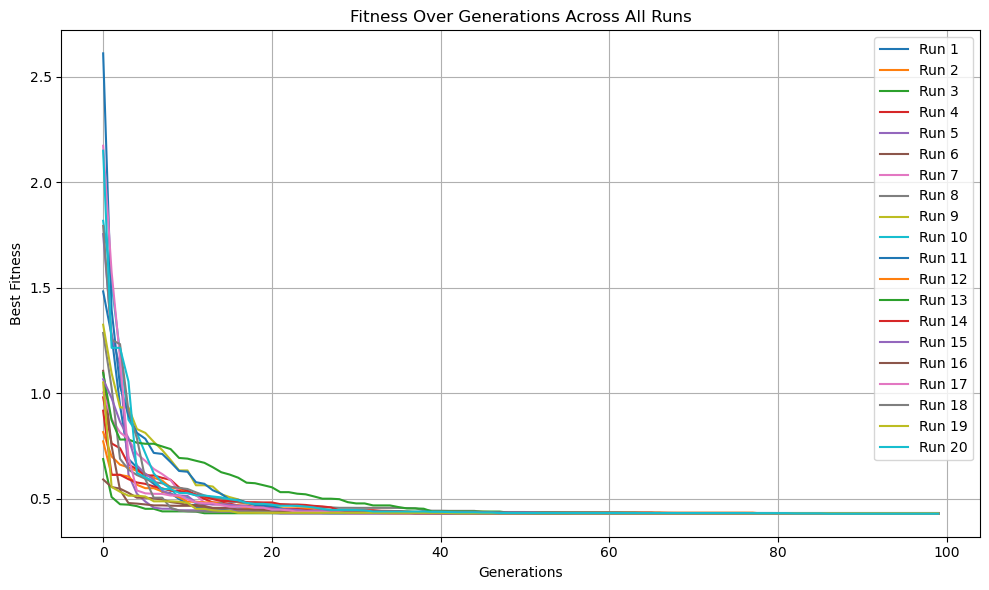


Running: mse_kicktime bias_zero, flag=False, mode=None
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)


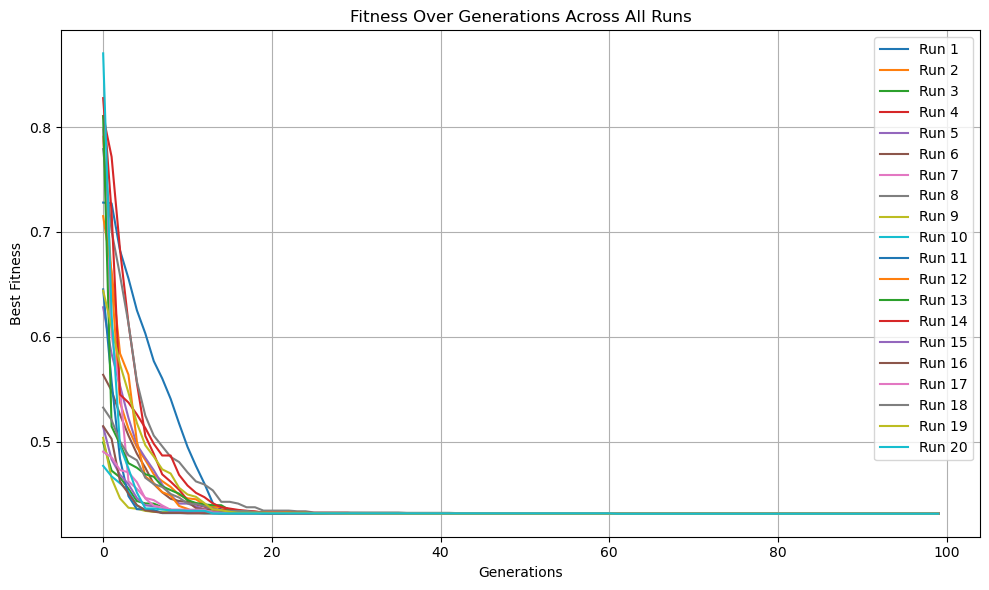


Running: mse_kicktime bias_random, flag=True, mode=None
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)


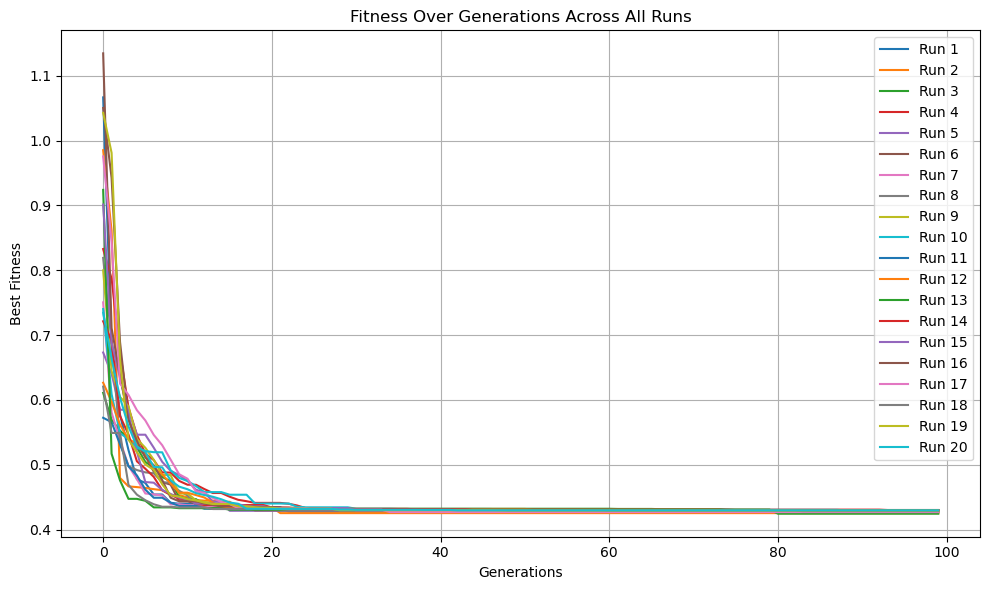


Running: mse_kicktime bias_wall, flag=True, mode=None
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)


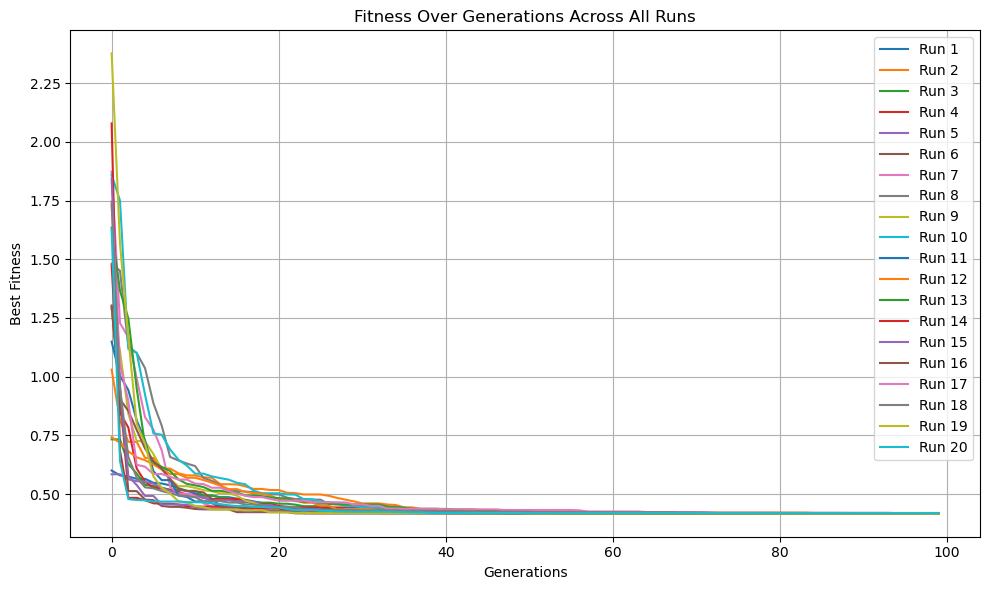


Running: mse_kicktime bias_positive, flag=True, mode=None
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)


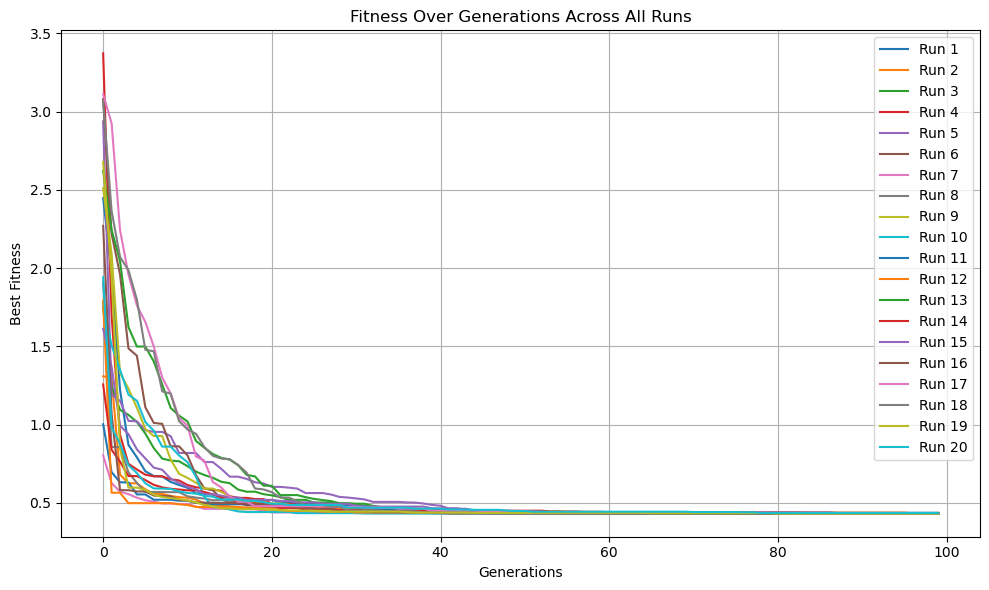


Running: mse_kicktime bias_negative, flag=True, mode=None
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)
Initial population shape: (40, 6)


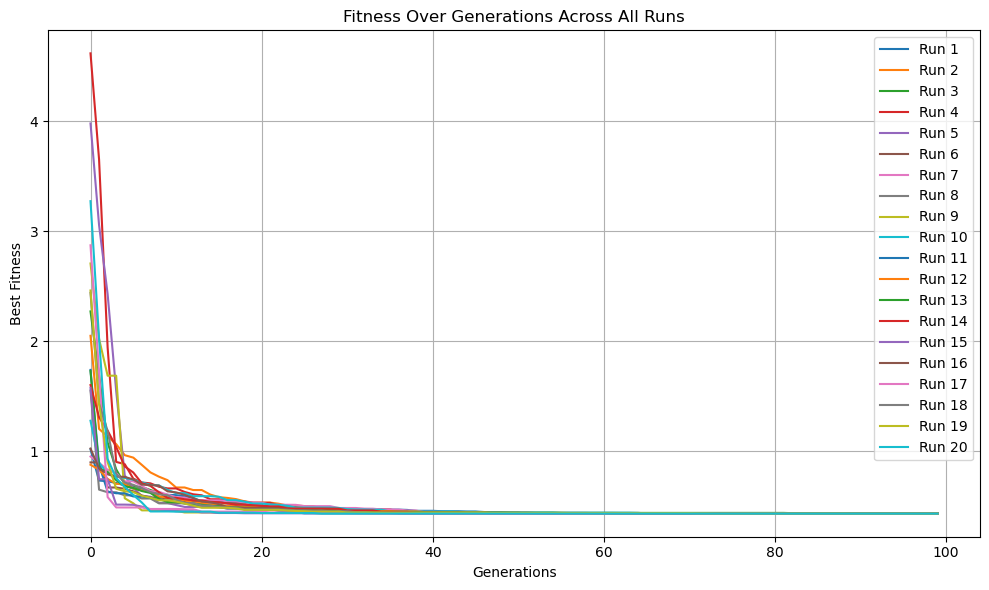

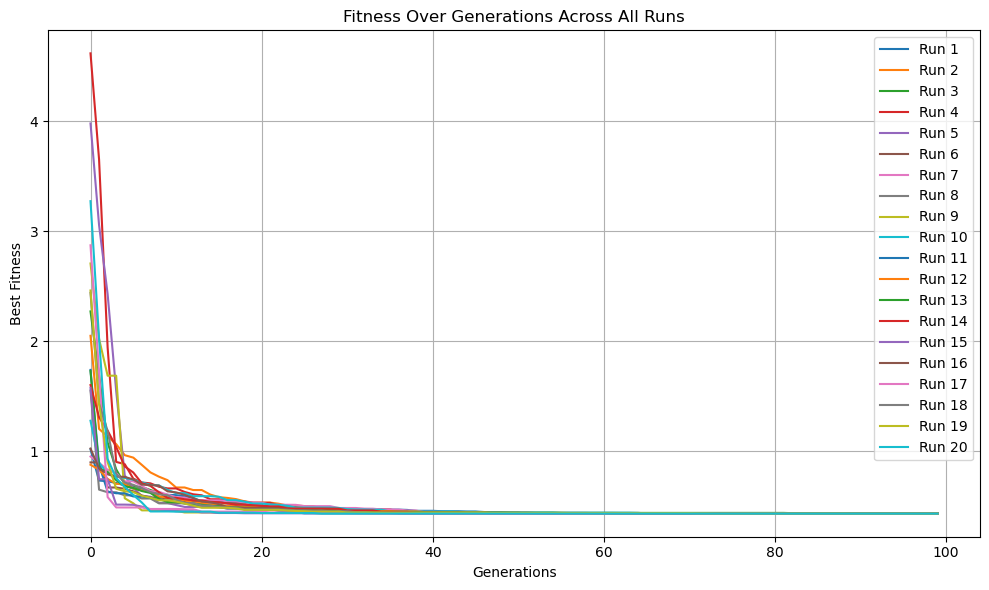

In [ ]:
all_runs_f, all_runs_x = run_experiment(population_size=40, p_crossover=0.6, m_rate=0.2, k=8, dimensions = 6)
plot_fitness_over_time(all_runs_f)


Experiment wall